# Bank Of Africa

In [1]:
from traitlets.traitlets import ForwardDeclaredInstance
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout,GRU
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Get the stock quote
boa=pd.read_csv('/content/drive/MyDrive/datasetBourse/BOA.csv')
boa.Date=pd.to_datetime(boa.Date ,format='%Y/%m/%d')
boa.index=boa.Date


In [11]:
boa=boa['2000-05-20':]

In [18]:

boa = boa.bfill()
print(boa)

                 Date  Ouverture  Plus haut  Plus bas    Prix  Quantité
Date                                                                   
2000-05-22 2000-05-22      64.11      63.71     63.71   63.71   4742.22
2000-05-23 2000-05-23      63.71      64.01     64.01   64.01   5534.28
2000-05-24 2000-05-24      64.01      64.11     64.11   64.11   6864.54
2000-05-25 2000-05-25      64.40      64.70     64.70   64.70  23670.46
2000-05-26 2000-05-26      64.70      64.50     64.50   64.50   5331.19
...               ...        ...        ...       ...     ...       ...
2022-05-16 2022-05-16     195.00     198.00    195.00  198.00     38.00
2022-05-17 2022-05-17     199.95     199.95    195.00  195.00   1160.00
2022-05-18 2022-05-18     195.00     195.00    195.00  195.00   1005.00
2022-05-19 2022-05-19     192.00     197.00    192.00  195.00   1747.00
2022-05-20 2022-05-20     195.00     196.50    193.00  193.00  26550.00

[5456 rows x 6 columns]


In [20]:
# Create a new dataframe with only the 'Close column 
data = boa.filter(['Prix'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .7 ))

training_data_len

3820

In [21]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.1067118 ],
       [0.10773755],
       [0.10807946],
       ...,
       [0.55561254],
       [0.55561254],
       [0.54877423]])

In [22]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.1067118 , 0.10773755, 0.10807946, 0.11009676, 0.10941293,
       0.11009676, 0.10975485, 0.10941293, 0.10975485, 0.10941293,
       0.10842138, 0.10842138, 0.10876329, 0.10876329, 0.10773755,
       0.10773755, 0.1046945 , 0.1046945 , 0.10438677, 0.10336103])]
[0.10301911307142612]

[array([0.1067118 , 0.10773755, 0.10807946, 0.11009676, 0.10941293,
       0.11009676, 0.10975485, 0.10941293, 0.10975485, 0.10941293,
       0.10842138, 0.10842138, 0.10876329, 0.10876329, 0.10773755,
       0.10773755, 0.1046945 , 0.1046945 , 0.10438677, 0.10336103]), array([0.10773755, 0.10807946, 0.11009676, 0.10941293, 0.11009676,
       0.10975485, 0.10941293, 0.10975485, 0.10941293, 0.10842138,
       0.10842138, 0.10876329, 0.10876329, 0.10773755, 0.10773755,
       0.1046945 , 0.1046945 , 0.10438677, 0.10336103, 0.10301911])]
[0.10301911307142612, 0.10370294389168118]



In [24]:
# Build the GRU Block model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1),     
                   recurrent_dropout=0.03,
                  ))

model.add(LSTM(64, return_sequences=False,
                   recurrent_dropout=0.02,
                  ))
model.add(Dense(units = 1024))
model.add(Dense(units = 512))
model.add(Dense(units = 256))
model.add(Dense(units = 128))
model.add(Dense(units = 64))
model.add(Dense(units = 32))
model.add(Dense(1))

# model.add(LSTM(units=64,
#                   return_sequences=True,
#                   input_shape=(x_train.shape[1], 1),
#                   recurrent_dropout=0.02,
#                   recurrent_regularizer=regularizers.l2(1e-3)))
# model.add(LSTM(units=32,
#                   #return_sequences=True,
#                   recurrent_dropout=0.02,
#                   recurrent_regularizer=regularizers.l2(1e-3)))

# # model.add(Dense(64, kernel_regularizer=regularizers.l2(1e-3)))
# model.add(Dense(16, kernel_regularizer=regularizers.l2(1e-3)))

# model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
119/119 [==============================] - 15s 85ms/step - loss: 0.0093
Epoch 2/50
119/119 [==============================] - 10s 86ms/step - loss: 5.1213e-04
Epoch 3/50
119/119 [==============================] - 10s 85ms/step - loss: 4.3309e-04
Epoch 4/50
119/119 [==============================] - 10s 85ms/step - loss: 4.9976e-04
Epoch 5/50
119/119 [==============================] - 10s 86ms/step - loss: 4.3532e-04
Epoch 6/50
119/119 [==============================] - 10s 86ms/step - loss: 4.4148e-04
Epoch 7/50
119/119 [==============================] - 10s 86ms/step - loss: 3.5333e-04
Epoch 8/50
119/119 [==============================] - 12s 102ms/step - loss: 4.3001e-04
Epoch 9/50
119/119 [==============================] - 10s 86ms/step - loss: 3.5711e-04
Epoch 10/50
119/119 [==============================] - 10s 86ms/step - loss: 3.3269e-04
Epoch 11/50
119/119 [==============================] - 10s 86ms/step - loss: 4.5884e-04
Epoch 12/50
119/119 [=======================

In [25]:
# Create the testing data set

# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 20: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


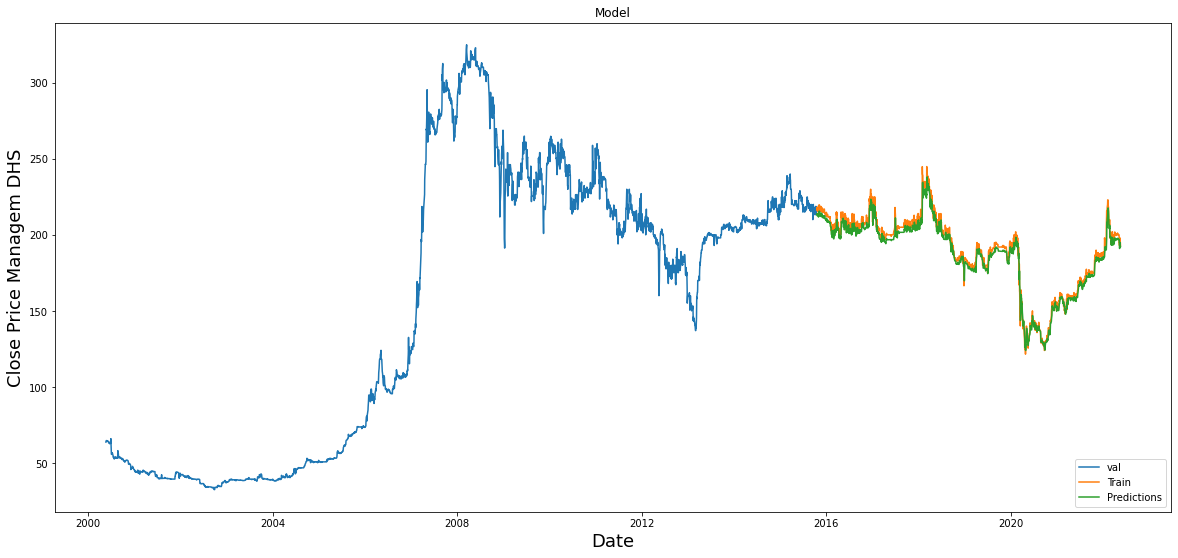

In [27]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(20,9))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Managem DHS', fontsize=18)
plt.plot(train['Prix'])
plt.plot(valid[['Prix', 'Predictions']])
plt.legend(['val', 'Train', 'Predictions'], loc='lower right')
plt.show()

In [28]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions- y_test) ** 2)))
print('RMSE: '+str(rmse))
  #mean absolute error
mae = mean_absolute_error(y_test, predictions)
print('MAE: '+str(mae))

RMSE: 3.8943439654299534
MAE: 3.1533563683843258


In [29]:
valid

,Prix,Predictions
Date,,
2015-10-21,217.95,213.717621
2015-10-22,216.00,213.961639
2015-10-23,218.00,212.584106
2015-10-26,218.00,213.539459
2015-10-27,218.00,213.895386
...,...,...
2022-05-16,198.00,193.782440
2022-05-17,195.00,194.958954
2022-05-18,195.00,193.157455
